# 연령대 예측

```
온라인 판매 사이트 운영자인 지우는 사용자의 로그인 기록으로부터 연령대를 예측하여 나이에 맞는 서비스를 제공하고자 한다. 

온라인 판매사이트 특성상 로그인 하는 사용자도 있지만, 로그인하지 않고 들어오는 고객도 많이 있으므로, 로그인 하는 사용자 기반으로 로그인 시간대를 분석하여 로그인 하지 않는 사용자의 연령대를 예측하는 모델을 개발하려고 한다. 

로그인 사용자는 자동 로그인을 통해 들어올 때마다 로그인 기록이 남는 고객들이다. 로그인하지 않는 사용자의 경우, 사용자 단말에 쿠키 등을 심어서 같은 사용자인지 확인하여 같은 사람임이 서로 다른 시간대에 로그인을 하더라도 동일인임을 인식하여, 시간대별 패턴을 수집하여 이 모델에 넣어 볼 예정이다

아래 데이터는 특정일 하루 동안 남긴 로그인 기록을 샘플링하여 얻은 데이터로, 각 행은 한 사용자가 하룻동안 남긴 로그인 기록이다. 이 데이터를 활용하여 아래 문제에 답하시오.

login_time.csv (구분자: comma(“,”), 3,596 Rows, 25 Columns)
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('data/login_time.csv')
print(df.shape)
df.head()

(3596, 25)


age  hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  \
0  0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
1  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   hour_07  hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   

   hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   hour_23  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

## Q 1

In [3]:
df

age  hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  \
0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
1     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...   ...      ...      ...      ...      ...      ...      ...      ...   
3591  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3592  2.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3593  2.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3594  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3595  2.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      hour_07  hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3591      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3592      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3593      0.0      0.0      1.0      1.0      0.0      0.0      0.0      0.0   
3594      1.0      0.0      1.0      0.0      0.0      0.0      1.0      0.0   
3595      0.0      0.0      2.0      0.0      0.0      0.0      0.0      0.0   

      hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
2         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3591      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
3592      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
3593      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3594      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3595      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   

      hour_23  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
3591      0.0  
3592      0.0  
3593      0.0  
3594      0.0  
3595      0.0  

[3596 rows x 25 columns]

```
한 행은 한 사용자가 하루 동안 남긴 로그인 기록이다. 로그인 기록에 대해 데이터 탐색을 수행한다. 

각 고객별 이 날 몇 개의 시간대에 로그인 했는지(=변수A)를 구하고, 연령대별 변수A에 대해 다섯 수치 요약과(다섯 수치 요약 : min, max, Q1, Q2, Q3) 연령대별 인원수를 구할 때, age=3인 경우의 인원수, age=2의 Q1, age=1의 Q2, age=0의 Q3를 순서대로 기술하시오.
(답안예시) 100,1,2,3
```

In [4]:
df["count"] = df.iloc[:, 1:].apply(lambda x : x != 0).sum(axis=1)

In [5]:
df

age  hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  \
0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
1     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...   ...      ...      ...      ...      ...      ...      ...      ...   
3591  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3592  2.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3593  2.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3594  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3595  2.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      hour_07  hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3591      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3592      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3593      0.0      0.0      1.0      1.0      0.0      0.0      0.0      0.0   
3594      1.0      0.0      1.0      0.0      0.0      0.0      1.0      0.0   
3595      0.0      0.0      2.0      0.0      0.0      0.0      0.0      0.0   

      hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
2         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3591      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
3592      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
3593      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3594      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3595      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   

      hour_23  count  
0         0.0      1  
1         0.0      2  
2         0.0      1  
3         0.0      1  
4         0.0      1  
...       ...    ...  
3591      0.0      2  
3592      0.0      2  
3593      0.0      2  
3594      0.0      3  
3595      0.0      2  

[3596 rows x 26 columns]

In [6]:
# age=3인 경우의 인원수, age=2의 Q1, age=1의 Q2, age=0의 Q3 확인
# 코드입력
df.groupby('age')['count'].describe()

count      mean       std  min  25%  50%  75%   max
age                                                      
0.0  1106.0  1.488246  0.629837  1.0  1.0  1.0  2.0   4.0
1.0   531.0  1.521657  0.740348  1.0  1.0  1.0  2.0   5.0
2.0  1076.0  2.119888  1.086721  1.0  1.0  2.0  3.0   7.0
3.0   883.0  2.548131  1.210641  1.0  2.0  2.0  3.0  11.0

In [7]:
df['age'].value_counts()

0.0    1106
2.0    1076
3.0     883
1.0     531
Name: age, dtype: int64

**정답: 883, 1, 1, 2**

## Q 2-1

```
연령대별 시간대별 로그인 패턴이 어떤 차이가 있는지 살펴보고자 한다. 

시간대별 방문자수를 구한 후 시간대를 X축으로 각 시간대별 방문자수를 Y축으로 하여 라인차트를 그리시오.
```

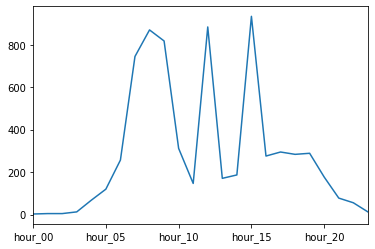

In [8]:
df.loc[:, 'hour_00':'hour_23'].sum().plot(kind='line')

## Q 2-2

```
당일배송을 지향하고 있는 이 쇼핑몰은 택배회사와의 배송시간 스케쥴을 잡기 위해, 시간대별 방문자수를 가늠하고자 한다. 

매번 정확한 시간대에 사람이 오는 것이 아니고 매 시간대마다 그 이후 2시간까지 빨리 올 수 있다는 것을 감안하여 방문자수를 산출하고 싶다. 
또한 새벽 시간대는 방문자수가 많지 않기 때문에 방문자수가 증가하기 시작하는 오전 5시부터 고객수가 급감하는 19시 까지만 산출하려 한다. 
단, 매 홀수 시간(5시, 7시, 9시, ... , 19시대)에 대해서만 산출한다. 

즉, 2-1 에서 구한 시간대별 방문자수를 활용하여, 5시대 고객수는 5~7시대 방문자수 합계로, 7시대 고객수는 7~9시대 방문자수 합계로, ... 19시대 고객수는 19~21시 방문자수 합계로 산출한다. 

이렇게 산출된 방문자수의 총합을 구하고, 시간대별 방문자수에 대해 시간대(X축)별 방문자수(Y축)에 대한 컬럼 차트를 그리시오. 

Hint : 먼저, 방문자수 산출 시간대 여부 변수(1/0)를 생성한다. 그리고 이 변수가 1인 경우에 대해 윈도우 함수를 사용하여 방문자수를 산출한다.
(답안예시) 12345

```

In [9]:
count = []
for i in range(5, 20, 2):
    start = f'hour_{i:02d}'
    end = f'hour_{i+2:02d}'
    print(start, end)
    count.append(df.loc[:, start:end].sum().sum())

hour_05 hour_07
hour_07 hour_09
hour_09 hour_11
hour_11 hour_13
hour_13 hour_15
hour_15 hour_17
hour_17 hour_19
hour_19 hour_21


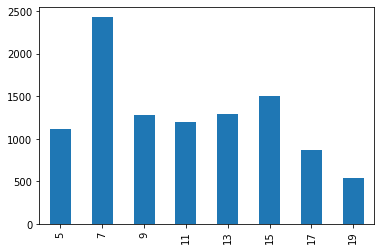

In [10]:
ax = plt.subplot()
pd.DataFrame(count).plot(kind='bar', ax=ax, legend=None)
ax.set_xticklabels(labels=['5', '7', '9', '11', '13', '15', '17', '19'])
plt.show()

## Q 2-3

```
2-1에서 시간대별 방문자수를 구하고 라인차트를 그렸던 것을 연령대를 구분하여 수행하시오. 

즉 시간대별 연령대별 방문자수를 구하고, 시간대를 X축으로 각 시간대별 방문자수를 Y축으로, 각 연령대를 색으로 구분하여 라인차트를 그리시오.
```

In [11]:
idx = [f'hour_{i:02d}' for i in range(5, 20, 2)]
idx

['hour_05',
 'hour_07',
 'hour_09',
 'hour_11',
 'hour_13',
 'hour_15',
 'hour_17',
 'hour_19']

In [12]:
df.groupby('age').sum().loc[:,'hour_05':'hour_21'].T.rolling(3).sum().shift(-2)

age        0.0    1.0    2.0    3.0
hour_05  540.0   31.0  246.0  305.0
hour_06  985.0   51.0  448.0  388.0
hour_07  947.0  502.0  490.0  494.0
hour_08  480.0  496.0  461.0  563.0
hour_09   46.0  479.0  270.0  482.0
hour_10   54.0   61.0  897.0  331.0
hour_11   58.0   79.0  834.0  231.0
hour_12   85.0   86.0  866.0  205.0
hour_13   90.0   64.0  265.0  873.0
hour_14  160.0   68.0  322.0  847.0
hour_15  239.0   81.0  328.0  857.0
hour_16  319.0   92.0  273.0  171.0
hour_17  321.0   88.0  264.0  195.0
hour_18  249.0   77.0  259.0  165.0
hour_19  165.0   56.0  200.0  123.0
hour_20    NaN    NaN    NaN    NaN
hour_21    NaN    NaN    NaN    NaN

In [13]:
df.groupby('age').sum().loc[:,'hour_05':'hour_21'].T.rolling(3).sum().shift(-2).loc[idx]

age        0.0    1.0    2.0    3.0
hour_05  540.0   31.0  246.0  305.0
hour_07  947.0  502.0  490.0  494.0
hour_09   46.0  479.0  270.0  482.0
hour_11   58.0   79.0  834.0  231.0
hour_13   90.0   64.0  265.0  873.0
hour_15  239.0   81.0  328.0  857.0
hour_17  321.0   88.0  264.0  195.0
hour_19  165.0   56.0  200.0  123.0

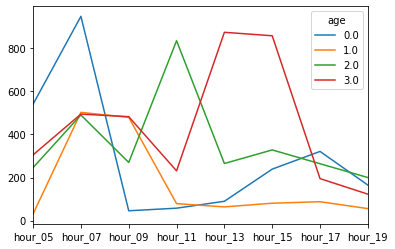

In [14]:
df.groupby('age').sum().loc[:,'hour_05':'hour_21'].T.rolling(3).sum().shift(-2).loc[idx].plot()

## Q 2-4

```
2-3 에서 시간대별(오전 5~19시의 홀수 시간대) 방문자수를 산출했다면, 이번에는 연령대를 구분하여, 연령대별 시간대별 방문자수를 동일한 방법으로 산출하시오. 

즉, 2.(3)에서 구한 시간대별 연령대별 방문자수를 활용하여, 오전 5~19시의 홀수시간대에 대해, 그 시간대를 포함한 두 시간대 이후까지의 로그인 방문자수를 합하여 해당시간대의 방문자수를 산출하시오. 

이 때, age가 1인 경우 15시, age가 2인 경우 17시, age가 3인 경우 19시대의 방문자수를 각각 구하면 얼마인가? 
(답안예시) 123, 123, 123
```

In [15]:
# age가 1인 경우 15시, age가 2인 경우 17시, age가 3인 경우 19시대의 방문자수를 각각 구한다.
df.groupby('age').sum().loc[:,'hour_05':'hour_21'].T.rolling(3).sum().shift(-2).loc[idx]

age        0.0    1.0    2.0    3.0
hour_05  540.0   31.0  246.0  305.0
hour_07  947.0  502.0  490.0  494.0
hour_09   46.0  479.0  270.0  482.0
hour_11   58.0   79.0  834.0  231.0
hour_13   90.0   64.0  265.0  873.0
hour_15  239.0   81.0  328.0  857.0
hour_17  321.0   88.0  264.0  195.0
hour_19  165.0   56.0  200.0  123.0

**정답: 81, 264, 123**

## Q 3

```
각 시간대별 로그인 패턴을 활용하여 연령대를 예측하는 모델을 개발하고자 한다. Training set 과 Test set 을 2:1로 나누는데 데이터셋 구성방식은 다음과 같다. 

- 데이터셋 구성방식 : 각 age 별로 Training set, Training set, Test set, Training set, Training set, Test set, .... 과 같이 나눈다. 즉 3으로 나눈 나머지가 0이면 test set, 그렇지 않은 경우 Training set으로 한다.
```

In [16]:
df

age  hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  \
0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
1     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...   ...      ...      ...      ...      ...      ...      ...      ...   
3591  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3592  2.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3593  2.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3594  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3595  2.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      hour_07  hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3591      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3592      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3593      0.0      0.0      1.0      1.0      0.0      0.0      0.0      0.0   
3594      1.0      0.0      1.0      0.0      0.0      0.0      1.0      0.0   
3595      0.0      0.0      2.0      0.0      0.0      0.0      0.0      0.0   

      hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
2         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3591      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
3592      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
3593      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3594      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3595      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   

      hour_23  count  
0         0.0      1  
1         0.0      2  
2         0.0      1  
3         0.0      1  
4         0.0      1  
...       ...    ...  
3591      0.0      2  
3592      0.0      2  
3593      0.0      2  
3594      0.0      3  
3595      0.0      2  

[3596 rows x 26 columns]

In [17]:
df_list = []

for i in range(4):
    df_age = df.loc[df['age'] == i].reset_index(drop=True)
    df_age.loc[(df_age.index+1) % 3 == 0, 'train'] = 0
    df_age.loc[~((df_age.index+1) % 3 == 0), 'train'] = 1
    df_list.append(df_age)

In [18]:
df2 = pd.concat(df_list, ignore_index=True)

In [19]:
df2

age  hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  \
0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
1     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...   ...      ...      ...      ...      ...      ...      ...      ...   
3591  3.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
3592  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3593  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3594  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3595  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      hour_07  hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3591      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3592      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3593      0.0      0.0      1.0      0.0      0.0      0.0      1.0      1.0   
3594      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3595      1.0      0.0      1.0      0.0      0.0      0.0      1.0      0.0   

      hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
2         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3591      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3592      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3593      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3594      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
3595      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      hour_23  count  train  
0         0.0      1    1.0  
1         0.0      2    1.0  
2         0.0      1    0.0  
3         0.0      1    1.0  
4         0.0      1    1.0  
...       ...    ...    ...  
3591      0.0      2    0.0  
3592      0.0      1    1.0  
3593      0.0      3    1.0  
3594      0.0      2    0.0  
3595      0.0      3    1.0  

[3596 rows x 27 columns]

In [20]:
train = df2.loc[df2['train'] == 1]
test = df2.loc[df2['train'] == 0]

In [21]:
train.head()

age  hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  \
0  0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
1  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   hour_07  hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
6      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   

   hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   hour_23  count  train  
0      0.0      1    1.0  
1      0.0      2    1.0  
3      0.0      1    1.0  
4      0.0      1    1.0  
6      0.0      1    1.0

In [22]:
test.head()

age  hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  \
2   0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5   0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8   0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
11  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
14  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

    hour_07  hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  \
2       1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5       1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
11      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
14      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   

    hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
2       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8       0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
11      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
14      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

    hour_23  count  train  
2       0.0      1    0.0  
5       0.0      1    0.0  
8       0.0      1    0.0  
11      0.0      1    0.0  
14      0.0      1    0.0

In [23]:
train = train.drop(['train', 'count'], 1)

In [24]:
test = test.drop(['train', 'count'], 1)

In [25]:
test

age  hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  \
2     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
11    0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
14    0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...   ...      ...      ...      ...      ...      ...      ...      ...   
3582  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3585  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3588  3.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
3591  3.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
3594  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      hour_07  hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  \
2         1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5         1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
11        0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
14        0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3582      0.0      0.0      1.0      0.0      0.0      0.0      0.0      1.0   
3585      0.0      0.0      1.0      0.0      0.0      0.0      1.0      0.0   
3588      0.0      0.0      1.0      0.0      1.0      0.0      0.0      1.0   
3591      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3594      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   

      hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
2         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8         0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
11        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
14        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3582      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
3585      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3588      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3591      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3594      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   

      hour_23  
2         0.0  
5         0.0  
8         0.0  
11        0.0  
14        0.0  
...       ...  
3582      0.0  
3585      0.0  
3588      0.0  
3591      0.0  
3594      0.0  

[1197 rows x 25 columns]

In [26]:
train

age  hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  \
0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
1     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...   ...      ...      ...      ...      ...      ...      ...      ...   
3589  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3590  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3592  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3593  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3595  3.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      hour_07  hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
6         0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3589      0.0      0.0      1.0      0.0      0.0      0.0      1.0      0.0   
3590      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3592      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3593      0.0      0.0      1.0      0.0      0.0      0.0      1.0      1.0   
3595      1.0      0.0      1.0      0.0      0.0      0.0      1.0      0.0   

      hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3589      0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
3590      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3592      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3593      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3595      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      hour_23  
0         0.0  
1         0.0  
3         0.0  
4         0.0  
6         0.0  
...       ...  
3589      0.0  
3590      0.0  
3592      0.0  
3593      0.0  
3595      0.0  

[2399 rows x 25 columns]

## Q 3-1

```
Training Set 을 Logistic Regression으로 학습하였을 때, 10대와 30~50대의 각 연령대의 회귀계수를 확인하고, 회귀계수가 가장 큰 시간대(7시~20시 대 중)를 각각 기술하시오. 

- seed=123, 문제에서 주어지지 않은 파라미터 세팅은 디폴트 세팅
(답안예시) 10,11
```

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logi = LogisticRegression(random_state=123)

In [29]:
logi.fit(train.drop('age', 1), train['age'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
logi.coef_.shape

(4, 24)

In [31]:
logi.coef_[0]

array([-0.02346443, -0.02942077,  0.14581292, -0.1655472 , -0.97511775,
       -1.92228397, -0.91160792,  0.77712319,  0.7246598 , -4.65261011,
       -1.16759229, -0.49724845, -4.68211766, -0.64848976, -0.69210547,
       -4.11596206,  0.37711422,  0.58728025,  0.23553182,  0.41420611,
       -0.0914522 , -0.19192021, -0.51909854,  0.34639185])

In [32]:
list(zip(train.drop('age', 1).columns, logi.coef_[0]))

[('hour_00', -0.02346442681428259),
 ('hour_01', -0.029420769365762118),
 ('hour_02', 0.1458129245662086),
 ('hour_03', -0.16554720305503784),
 ('hour_04', -0.9751177524246892),
 ('hour_05', -1.922283974437439),
 ('hour_06', -0.9116079172035498),
 ('hour_07', 0.7771231941017563),
 ('hour_08', 0.7246598040088157),
 ('hour_09', -4.652610113892864),
 ('hour_10', -1.167592292071128),
 ('hour_11', -0.49724845438238374),
 ('hour_12', -4.682117657567203),
 ('hour_13', -0.6484897608955823),
 ('hour_14', -0.6921054739021348),
 ('hour_15', -4.115962056200994),
 ('hour_16', 0.37711422064402406),
 ('hour_17', 0.5872802473957279),
 ('hour_18', 0.23553182351435173),
 ('hour_19', 0.4142061120838857),
 ('hour_20', -0.09145219972017966),
 ('hour_21', -0.19192021067532933),
 ('hour_22', -0.519098544146864),
 ('hour_23', 0.346391848424151)]

In [33]:
# 연령대(0:10대, 1:20대, 2:30~50대, 3:60대 이상)

In [34]:
# 연령대 10대
pd.DataFrame(list(zip(train.drop('age', 1).columns, logi.coef_[0]))).sort_values(1, ascending=False).head()

0         1
7   hour_07  0.777123
8   hour_08  0.724660
17  hour_17  0.587280
19  hour_19  0.414206
16  hour_16  0.377114

In [35]:
# 연령대 30~50대
pd.DataFrame(list(zip(train.drop('age', 1).columns, logi.coef_[2]))).sort_values(1, ascending=False).head()

0         1
12  hour_12  3.496783
22  hour_22  0.624409
21  hour_21  0.606647
20  hour_20  0.581560
11  hour_11  0.559354

## Q 3-2

```
10대와 30~50대의 (1)에서 구한 시간대에 대한 회귀계수를 순서대로 기술하시오. 소수점 셋째 자리 아래는 버리고, 소수점 셋째 자리까지 기술하시오.
```

In [36]:
# 연령대 10대
pd.DataFrame(list(zip(train.drop('age', 1).columns, logi.coef_[0]))).sort_values(1, ascending=False).head()

0         1
7   hour_07  0.777123
8   hour_08  0.724660
17  hour_17  0.587280
19  hour_19  0.414206
16  hour_16  0.377114

In [37]:
# 연령대 30~50대
pd.DataFrame(list(zip(train.drop('age', 1).columns, logi.coef_[2]))).sort_values(1, ascending=False).head()

0         1
12  hour_12  3.496783
22  hour_22  0.624409
21  hour_21  0.606647
20  hour_20  0.581560
11  hour_11  0.559354

## Q 3-3

```
Test Set의 시간대별 로그인 기록으로 연령대를 예측할 때, 정확도(%)를 기술하시오. 

소수점 셋째 자리 아래는 버리고, 소수점 셋째 자리까지 기술하시오
```

In [38]:
pred = logi.predict(test.drop('age', 1))
pred

array([0., 0., 0., ..., 3., 1., 1.])

In [39]:
(pred == test['age']).sum()

988

In [40]:
(pred == test['age']).mean() * 100

82.53968253968253

## Q 4

```
3번에서 만든 Training set을 사용하여 각 시간대별 로그인 패턴을 활용하여 연령대를 예측하는 모델을 Polynomial SVM 으로 개발 한다(Kernel을 Polynomial, seed를 123으로 하고 다른 옵션은 디폴트를 사용한다). 

이 모델에 Test Set 을 적용할 때, Test Set 내의 1번째 사용자와 1000번째 사용자에 대해 예측된 연령대(age)는 각각 무엇인가?

(답안예시) 1,2
```

[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC(kernel='poly', random_state=123)

In [43]:
svc.fit(train.drop('age', 1), train['age'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=123,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
pred = svc.predict(test.drop('age', 1))

In [45]:
print(f'1번째 사용자: {pred[0]}')
print(f'1000번째 사용자: {pred[999]}')

1번째 사용자: 0.0
1000번째 사용자: 0.0


## Q 5

```
3번에서 만든 Training set을 사용하여 각 시간대별 로그인 패턴을 활용하여 연령대를 예측하는 모델을 Decision Tree 로 개발 한다(max depth =3, seed=123으로 하고 다른 옵션은 디폴트를 사용한다.). 

이 모델에서 hour_15=1, hour_12=1, hour_13=0 인 경우 어떤 연령대로 예측되는지 연령대를 작성하시오.
```

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=123)

In [48]:
dtc.fit(train.drop('age', 1), train['age'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [61]:
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [49]:
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

def show_trees(tree):
    export_graphviz(tree, 
                    out_file="tree.dot", 
                    class_names=['0', '1', '2', '3'],
                    feature_names=train.drop('age', 1).columns, 
                    precision=3, 
                    filled=True)
    with open("tree.dot") as f:
        dot_graph = f.read()
    pred = tree.predict(test.drop('age', 1))
    print('정확도: {:.2f} %'.format(accuracy_score(test['age'], pred) * 100))
    display(graphviz.Source(dot_graph))
    
show_trees(dtc)

정확도: 82.54 %


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

## Q 6

```
3번에서 만든 Training set을 사용하여 각 시간대별 로그인 패턴을 활용하여 연령대를 예측하는 모델로 Random Forest와 XGBoost를 사용할 때, 두 모델에서 중요도가 가장 높은 변수 3개를 각각 차례대로 쓰시오.

- Random Forest: number of trees =100, seed=123
- XGBoost : max_depth=5, seed=123
- 문제에서 주어지지 않은 파라미터 세팅은 디폴트 세팅

(답안예시) hour_01, hour_02, hour_03, hour_01, hour_02, hour_03
```

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier(n_estimators=100, random_state=123)

In [64]:
rfc.fit(train.drop('age', 1), train['age'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [72]:
# 코드입력
pd.DataFrame(list(zip(train.drop('age', 1).columns, rfc.feature_importances_))).sort_values(1, ascending=False)

0         1
15  hour_15  0.279488
12  hour_12  0.257971
9   hour_09  0.159491
7   hour_07  0.067566
8   hour_08  0.052624
10  hour_10  0.023278
6   hour_06  0.019534
5   hour_05  0.014537
17  hour_17  0.013941
14  hour_14  0.013896
16  hour_16  0.013576
18  hour_18  0.013450
13  hour_13  0.013128
19  hour_19  0.012339
20  hour_20  0.012010
11  hour_11  0.011523
4   hour_04  0.007013
22  hour_22  0.005589
21  hour_21  0.005245
23  hour_23  0.001736
3   hour_03  0.001471
2   hour_02  0.000424
1   hour_01  0.000108
0   hour_00  0.000063

In [73]:
from xgboost import XGBClassifier

In [74]:
xgb = XGBClassifier(max_depth=5, random_state=123)

In [75]:
xgb.fit(train.drop('age', 1), train['age'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [77]:
# 코드입력
pd.DataFrame(list(zip(train.drop('age', 1).columns, xgb.feature_importances_))).sort_values(1, ascending=False)

0         1
10  hour_10  0.084175
9   hour_09  0.084003
12  hour_12  0.084003
15  hour_15  0.083319
7   hour_07  0.082635
8   hour_08  0.073396
17  hour_17  0.060907
18  hour_18  0.054748
16  hour_16  0.051839
19  hour_19  0.046878
5   hour_05  0.040719
22  hour_22  0.038837
13  hour_13  0.038323
6   hour_06  0.037297
14  hour_14  0.036441
20  hour_20  0.036099
11  hour_11  0.025663
4   hour_04  0.015056
21  hour_21  0.013003
3   hour_03  0.009581
23  hour_23  0.003080
1   hour_01  0.000000
2   hour_02  0.000000
0   hour_00  0.000000

## Q 7

```
각 시간대별 로그인 패턴을 활용하여 연령대를 예측하는 모델을 개발하고자 한다. 
가장 적절한 방법으로 모델을 학습하고, login_time_x.csv를 사용하여 연령대(age)를 예측하시오.

모델링에 사용한 모델과 csv 파일을 제출하시오. csv파일은 login_time_x.csv와 동일하게 312행이며, age라는 컬럼으로 구성된 파일이다.
```

In [78]:
df.head()

age  hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  \
0  0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
1  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   hour_07  hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   

   hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   hour_23  count  
0      0.0      1  
1      0.0      2  
2      0.0      1  
3      0.0      1  
4      0.0      1

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(["age", "count"], 1), df["age"], random_state=123)

In [81]:
x_train.head()

hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  hour_07  \
2715      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
2511      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
249       0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
68        0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
577       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
2715      0.0      1.0      0.0      1.0      0.0      0.0      0.0      1.0   
2511      0.0      0.0      0.0      1.0      0.0      0.0      0.0      1.0   
249       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
68        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
577       1.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0   

      hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  
2715      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0  
2511      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
249       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
68        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
577       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0

In [82]:
y_train.head()

2715    3.0
2511    3.0
249     0.0
68      0.0
577     0.0
Name: age, dtype: float64

In [83]:
rfc = RandomForestClassifier(n_estimators=100, random_state=123)
pred = rfc.fit(x_train , y_train).predict(x_test)
# 정확도
(pred == y_test).mean()

0.8331479421579533

In [84]:
test = pd.read_csv('data/login_time_x.csv')

In [85]:
test.head()

hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  hour_07  \
0        0        0        0        1        0        0        0        0   
1        0        0        0        0        0        0        1        1   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
0        1        1        0        0        0        0        0        1   
1        1        0        0        0        0        0        0        1   
2        0        1        0        0        0        0        0        0   
3        0        0        1        0        1        0        0        0   
4        0        1        0        0        0        0        0        0   

   hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  
0        0        0        0        0        0        0        0        0  
1        1        0        1        0        0        0        0        0  
2        0        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0        0  
4        0        0        1        0        0        0        0        0

In [86]:
prediction = rfc.predict(test)
prediction

array([3., 3., 1., 2., 1., 1., 0., 2., 0., 0., 2., 2., 3., 0., 0., 1., 3.,
       1., 0., 0., 2., 2., 0., 3., 3., 0., 2., 0., 2., 1., 1., 0., 2., 3.,
       2., 0., 3., 2., 0., 2., 2., 3., 0., 0., 2., 0., 2., 2., 0., 0., 0.,
       2., 1., 2., 0., 3., 2., 0., 1., 2., 1., 0., 3., 0., 0., 3., 3., 0.,
       2., 0., 0., 3., 3., 2., 3., 3., 3., 0., 1., 0., 1., 2., 3., 0., 0.,
       0., 0., 2., 2., 1., 3., 0., 2., 0., 3., 0., 2., 1., 0., 3., 0., 1.,
       3., 0., 2., 0., 0., 2., 0., 3., 2., 3., 0., 0., 1., 3., 0., 2., 0.,
       2., 2., 1., 2., 2., 3., 0., 0., 2., 0., 0., 1., 0., 0., 1., 1., 3.,
       2., 0., 3., 3., 0., 0., 2., 2., 0., 3., 1., 0., 0., 0., 3., 0., 0.,
       1., 3., 0., 2., 2., 2., 0., 2., 1., 2., 3., 0., 1., 3., 2., 0., 0.,
       0., 3., 3., 0., 3., 2., 3., 0., 0., 0., 0., 0., 2., 0., 2., 0., 1.,
       3., 0., 0., 0., 3., 0., 0., 0., 1., 0., 3., 0., 2., 2., 0., 1., 2.,
       0., 2., 0., 1., 0., 2., 3., 2., 0., 1., 2., 2., 0., 0., 3., 0., 0.,
       0., 3., 0., 3., 0.

In [87]:
test['age'] = prediction

In [88]:
test.head()

hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  hour_06  hour_07  \
0        0        0        0        1        0        0        0        0   
1        0        0        0        0        0        0        1        1   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hour_08  hour_09  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
0        1        1        0        0        0        0        0        1   
1        1        0        0        0        0        0        0        1   
2        0        1        0        0        0        0        0        0   
3        0        0        1        0        1        0        0        0   
4        0        1        0        0        0        0        0        0   

   hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  age  
0        0        0        0        0        0        0        0        0  3.0  
1        1        0        1        0        0        0        0        0  3.0  
2        0        0        0        0        0        0        0        0  1.0  
3        0        0        0        0        0        0        0        0  2.0  
4        0        0        1        0        0        0        0        0  1.0

In [89]:
# 파일 제출
test.to_csv('login_time_x.csv', index=False)